In [1]:
import os
import sys

# print(f"Current Working Directory --> {os.getcwd()}")
#Add one directory above research
parent_dir = os.path.abspath(os.path.join(os.getcwd(), "..")) # Get the parent directory
sys.path.append(parent_dir)
current_working_dir = %pwd

print(f"Parent Dir >>> {parent_dir}")
print(f"Current Working Dir >>> {current_working_dir}")

# from configs import cfgs  # Absolute import

Parent Dir >>> C:\Users\maz\dev\Projects_\alzheimer
Current Working Dir >>> C:\Users\maz\dev\Projects_\alzheimer\research


In [2]:
import warnings

warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)
# warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)

### Imports

In [3]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.pipeline import Pipeline
import pprint
import ipywidgets as widgets
from IPython.display import display
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

pp = pprint.PrettyPrinter(indent=2)

# Custom Functions
from utils import *

#### Paths

In [4]:
# Create a path object
# dataset_dir = cfgs["DATASET_DIR"]
dataset_dir = "..//dataset//modified"
dataset_path = Path(dataset_dir)
print("Dataset Path")
print("*"*12)
print(f"Dataset: {dataset_path}")
print("\n")

# Find all CSV files inside the directory
files = list(dataset_path.glob("*.csv"))

print("Files in Dataset Dir:")
print("*"*21)
for file_path in files:
    print(file_path.name)  # Print only the file name


# Combining multiple paths
# path_metadata = dataset_path / "MetaData.xlsx"
path_train = dataset_path / "train.csv"
path_test = dataset_path / "test.csv"
path_train_new = dataset_path / "train_without_featEng.csv"

print("\n")
print(f"Train File Path --> {path_train}")

Dataset Path
************
Dataset: ..\dataset\modified


Files in Dataset Dir:
*********************
test.csv
test_features.csv
test_labels.csv
train.csv
train_features.csv
train_labels.csv


Train File Path --> ..\dataset\modified\train.csv


#### Vars

In [5]:
SPECIFIC_COL_TO_DROP = ['Year']

THRESHOLD_RATIO = 0.1
MAX_UNIQUE = 50

# These are rudundant features
COLS_TO_DROP = ['UID', 'imss_03', 'imss_12', 'issste_03', 'issste_12', 'pem_def_mar_03', 'pem_def_mar_12',
                   'insur_private_03', 'insur_private_12', 'insur_other_03', 'insur_other_12', 'seg_pop_12',
                   'Tired_03', 'Tired_12', 'Happy_03', 'Happy_12']

THRESHOLD_MISSING = 70.0

NUM_STRATEGY = "median"
CAT_STRATEGY = "mode"

THRESHOLD_QUASI_CONSTANT = 0.00000001 # 0.01 (drops -> cols: 23), 0.005 (drops -> cols: 18), 0.00000001

#### Data Loading

##### We will load cleaned file which is saved in notebook `1_eda.ipynb`

In [6]:
# pd.set_option("display.max_columns", None)
# pd.set_option("display.max_rows", None)

In [7]:
try:
    dfTrain = pd.read_csv(path_train, encoding = 'utf8')
    display(dfTrain.head(2))
    print(dfTrain.shape)
except FileNotFoundError:
    print("Error: 'train.csv' not found. Please ensure the file is in the correct location.")
    dfTrain = None

,UID,Year,composite_score,Age_03,Urban_03,Married_03,Marriages_03,Education_03,Num_Living_Child_03,Migration_03,...,Meet_FnF_12,SocialActivities_12,AttendReligiousServices_12,a16a_12,YrsLivedInUSA_12,a22_12,a33b_12,SpeaksEnglish_12,HousingEnvironment_12,PredictionYear
0,aard,2021,104,50-59,Urban,Widowed,1.0,7-9 Years,1 or 2,0.0,...,Once a week,Never,1.0,NaN,NaN,NaN,NaN,0.0,Concrete,9
1,abme,2021,106,50-59,Rural,Married or In Civil Union,1.0,1-5 Years,5 or 6,0.0,...,Never,Never,0.0,NaN,NaN,NaN,NaN,0.0,Concrete,9


(2889, 185)


#### Examine Data

In [8]:
# dfTrain.info(verbose=True, show_counts=True)

In [9]:
# # Get all dtypes as a Series
# all_dtypes = dfTrain.dtypes
# print("\nAll dtypes (Series):")
# print(all_dtypes)
# print("-" * 30)

# # Get unique dtypes
# unique_dtypes = dfTrain.dtypes.unique()
# print("\nUnique dtypes (NumPy array of dtype objects):")
# print(unique_dtypes)
# print("-" * 30)

dtype_summary_result = get_dtype_summary(dfTrain)

print("*" * 39)
print("Detailed Dtype Summary (from function):")
print("*" * 39)
# pp = pprint.PrettyPrinter(indent=2)
# pp.pprint(dtype_summary_result)
# pp.pprint(dtype_summary_result["float64"]["columns"])
print(f"Data Type 'float64' ==> Total: {len(dtype_summary_result['float64']['columns'])}\n Columns Name: {dtype_summary_result['float64']['columns']}\n")
print(f"Data Type 'int64' ==> Total: {len(dtype_summary_result['int64']['columns'])}\n Columns Name: {dtype_summary_result['int64']['columns']}\n")
print(f"Data Type 'object' ==> Total: {len(dtype_summary_result['object']['columns'])}\n Columns Name: {dtype_summary_result['object']['columns']}\n")

***************************************
Detailed Dtype Summary (from function):
***************************************
Data Type 'float64' ==> Total: 141
 Columns Name: ['Marriages_03', 'Migration_03', 'ADL_Dress_03', 'ADL_Walk_03', 'ADL_Bath_03', 'ADL_Eat_03', 'ADL_Bed_03', 'ADL_Toilet_03', 'Num_ADL_03', 'IADL_Money_03', 'IADL_Meds_03', 'IADL_Shop_03', 'IADL_Meals_03', 'Num_IADL_03', 'Depressed_03', 'Hard_03', 'Restless_03', 'Happy_03', 'Lonely_03', 'Enjoy_03', 'Sad_03', 'Tired_03', 'Energetic_03', 'Num_CES-D_Symptoms_03', 'CES-D_Symptoms_03', 'Hypertension_03', 'Diabetes_03', 'Respiratory_Illness_03', 'Arthritis_03', 'HeartAttack_03', 'Stroke_03', 'Cancer_03', 'Num_Illnesses_03', 'Exercise_03', 'Alcohol_03', 'Tobacco_03', 'Test_Cholestrol_03', 'Test_Tuber_03', 'Test_Diabetes_03', 'Test_BloodPress_03', 'Hospitalized_03', 'Visit_Dr_03', 'OutPatient_03', 'Visit_Dental_03', 'imss_03', 'issste_03', 'pem_def_mar_03', 'insur_private_03', 'insur_other_03', 'Insured_03', 'Marriages_12', 'Mig

In [10]:
# --- Define the Pipeline ---
# Note: The order matters if transformations depend on previous ones,
data_type_conversion = Pipeline([
    ('specific_categorizer', SpecificColumnCategorizer(columns_to_categorize=SPECIFIC_COL_TO_DROP)),
    ('object_to_category', ObjectToCategoryTransformer(threshold_ratio=THRESHOLD_RATIO, max_unique=MAX_UNIQUE)),
    ('float_to_category', FloatToCategoryTransformer()),
    # ('bool_to_category', BooleanToCategoryTransformer())
])

dropColumns = Pipeline([
    ('drop_columns', ColumnDropper(columns_to_drop=COLS_TO_DROP)),
])

dropColumnsHighNA = Pipeline([
    ('drop_columns_high_na', DropColumnsHighNA(threshold=THRESHOLD_MISSING)),
])

missingValueImputer = Pipeline([
    ('missing_value_imputer', MissingValueImputer(num_strategy=NUM_STRATEGY, cat_strategy=CAT_STRATEGY)),
])

identifyAndDropLowVarNum = Pipeline([
    ('identify_and_drop_low_var_num', IdentifyAndDropLowVarNum(quasi_constant_threshold=THRESHOLD_QUASI_CONSTANT)),
])


dataPreprocessing_pipeline = Pipeline([
    ('1_data_type_conversion', data_type_conversion),
    ('2_drop_columns', dropColumns),
    ('3_drop_high_na_columns', dropColumnsHighNA),
    ('4_impute_missing_values', missingValueImputer),
    ('5_identify_and_drop_low_var_num', identifyAndDropLowVarNum),
    # You can add more steps here, e.g., scaling, encoding, etc.
    # ('5_scaling', StandardScaler()), # Example
])

In [11]:
%%capture
print("*" * 48)
print("--- Applying Pipeline | Data Preprocessing ---")
print("*" * 48)
df = dataPreprocessing_pipeline.fit_transform(dfTrain)

In [12]:
print(f"--- PipeLine Completed ---")

--- PipeLine Completed ---


In [13]:
len(df.columns)

160

In [14]:
# # Get all dtypes as a Series
# all_dtypes = df.dtypes
# print("\nAll dtypes (Series):")
# print(all_dtypes)
# print("-" * 30)

# # Get unique dtypes
# unique_dtypes = df.dtypes.unique()
# print("\nUnique dtypes (NumPy array of dtype objects):")
# print(unique_dtypes)
# print("-" * 30)

In [29]:
# dtype_summary_result = get_dtype_summary(df)

# print("*" * 39)
# print("Detailed Dtype Summary (from function):")
# print("*" * 39)
# # pp = pprint.PrettyPrinter(indent=2)
# # pp.pprint(dtype_summary_result)
# # pp.pprint(dtype_summary_result["float64"]["columns"])
# print(f"Data Type 'float64' ==> Total: {len(dtype_summary_result['float64']['columns'])}\n Columns Name: {dtype_summary_result['float64']['columns']}\n")
# print(f"Data Type 'int64' ==> Total: {len(dtype_summary_result['int64']['columns'])}\n Columns Name: {dtype_summary_result['int64']['columns']}\n")
# print(f"Data Type 'object' ==> Total: {len(dtype_summary_result['category']['columns'])}\n Columns Name: {dtype_summary_result['category']['columns']}\n")

#### Correlation Matrix

************************************************
Plotting Correlation Matrix Using SNS | HeatMap
************************************************


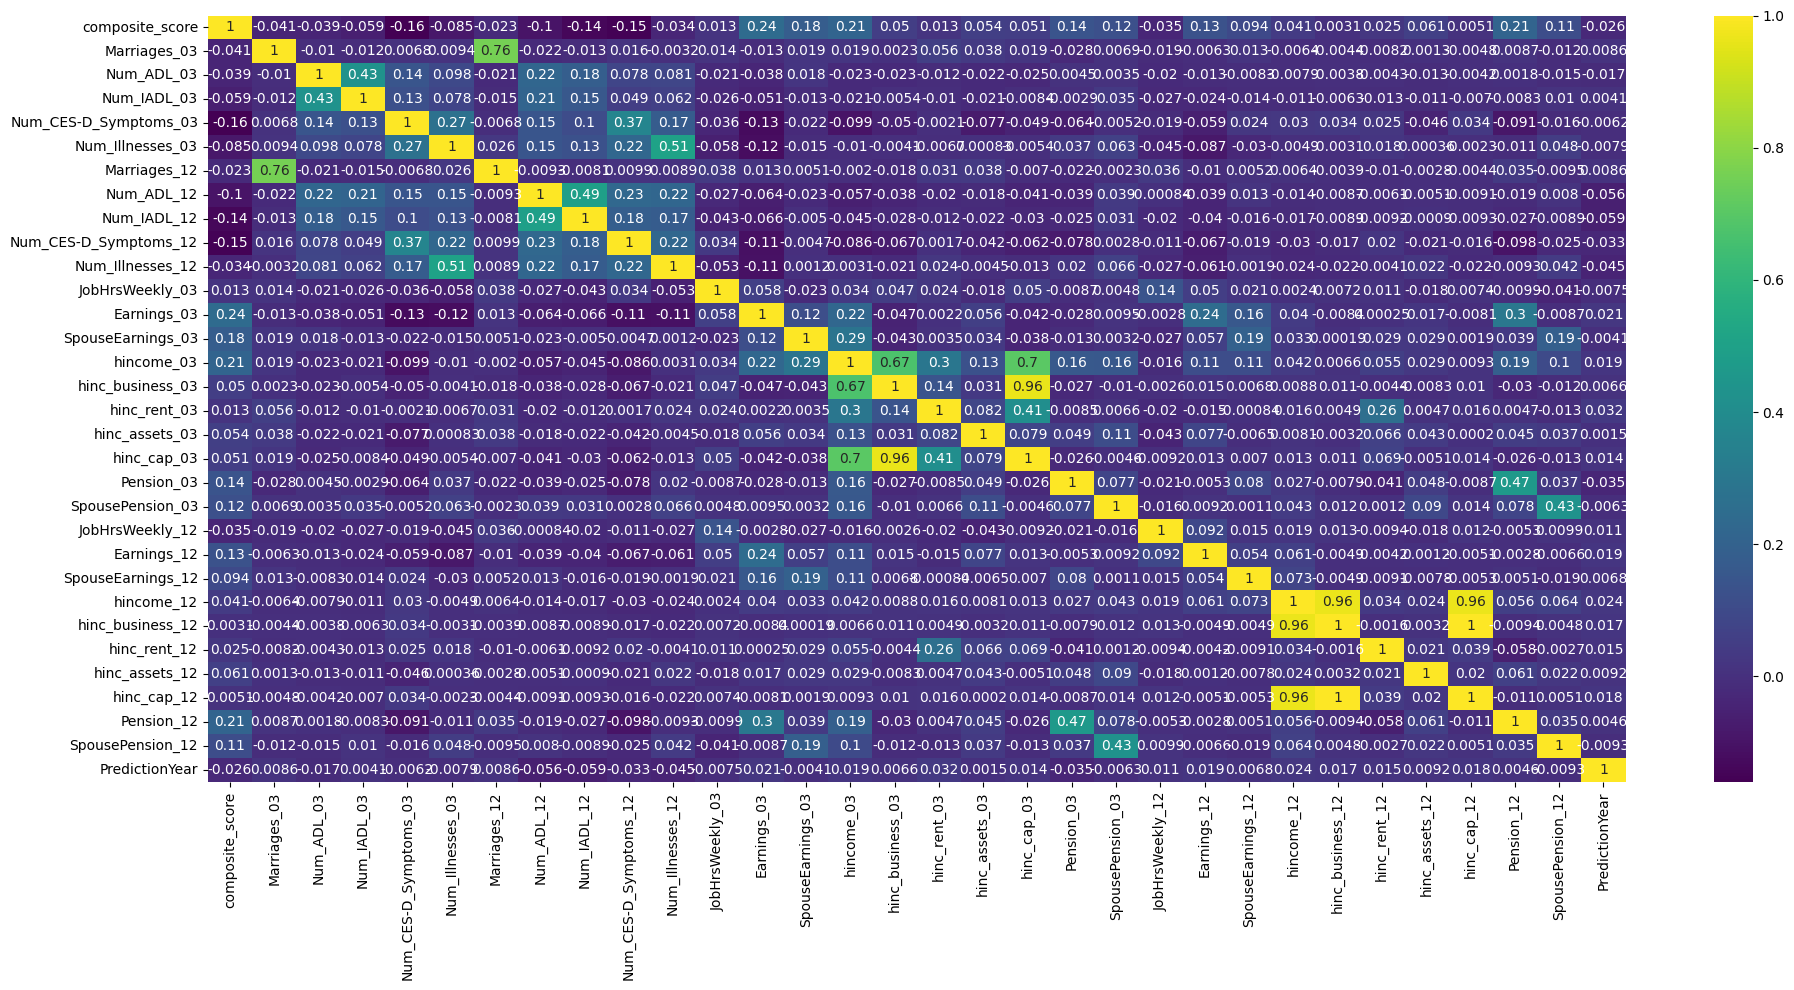

***********************************
Identify highly correlated features
***********************************
Highly Correlated Features | Above threshold of 0.7:
- `Marriages_12` and `Marriages_03`: 0.76
- `hinc_cap_03` and `hincome_03`: 0.70
- `hinc_cap_03` and `hinc_business_03`: 0.96
- `hinc_business_12` and `hincome_12`: 0.96
- `hinc_cap_12` and `hincome_12`: 0.96
- `hinc_cap_12` and `hinc_business_12`: 1.00


***********************************
Custom thresholds (absolute values)
***********************************

Low Magnitude Correlations:
- `Num_IADL_03` and `Num_ADL_03`: 0.43 (abs: 0.43)
- `Num_IADL_12` and `Num_ADL_12`: 0.49 (abs: 0.49)
- `Num_CES-D_Symptoms_12` and `Num_CES-D_Symptoms_03`: 0.37 (abs: 0.37)
- `hinc_cap_03` and `hinc_rent_03`: 0.41 (abs: 0.41)
- `Pension_12` and `Earnings_03`: 0.30 (abs: 0.30)
- `Pension_12` and `Pension_03`: 0.47 (abs: 0.47)
- `SpousePension_12` and `SpousePension_03`: 0.43 (abs: 0.43)

Medium Magnitude Correlations:
- `Marriages_12` and `Ma

In [16]:
# # Calculate the correlation matrix
correlation_matrix = df.corr(numeric_only = True)

# --- SNS Plot ----
print("*" * 48)
print("Plotting Correlation Matrix Using SNS | HeatMap")
print("*" * 48)
plt.figure(figsize = (20, 10)) 
sns.heatmap(correlation_matrix, annot = True, cmap="viridis")
plt.tight_layout()
plt.show()

# # --- Plotly Plot ----
# print("*" * 50)
# print("Plotting Correlation Matrix Using Plotly | HeatMap")
# print("*" * 50)
# plot_correlation_heatmap_plotly(
#     df, background_color="white", text_color="black", 
#     color_scale="Viridis",  # Plotly named colorscale (e.g., 'Viridis', 'Plasma', 'Blues', 'Reds')
#     title="Correlation Matrix | Heatmap", decimal_places_annot=2,  # For annotation rounding
#     width=1200, height=800
# )


print("*" * 35)
print("Identify highly correlated features")
print("*" * 35)
THRESHOLD_CORR = 0.7 # Define a correlation threshold (adjust as needed)
highly_correlated_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i):  # Avoid redundant comparisons and diagonal elements
        if abs(correlation_matrix.iloc[i, j]) > THRESHOLD_CORR:
            col1 = correlation_matrix.columns[i]
            col2 = correlation_matrix.columns[j]
            correlation = correlation_matrix.iloc[i, j]
            highly_correlated_pairs.append((col1, col2, correlation))

# Print the highly correlated pairs
if highly_correlated_pairs:
    print(f"Highly Correlated Features | Above threshold of {THRESHOLD_CORR}:")
    for col1, col2, correlation in highly_correlated_pairs:
        print(f"- `{col1}` and `{col2}`: {correlation:.2f}")
else:
    print("No highly correlated features found above the threshold.")


print("\n")
print("*" * 35)
print("Custom thresholds (absolute values)")
print("*" * 35)
custom_abs_thresholds = {
    "low_magnitude": (0.3, 0.5),  # |corr| in [0.3, 0.5)
    "medium_magnitude": (0.5, 0.8),  # |corr| in [0.5, 0.8)
    "high_magnitude": (0.8, 1.000001),  # |corr| in [0.8, 1.0]
}
correlation_results_custom_abs = analyze_feature_correlations(df, thresholds=custom_abs_thresholds)
for level, pairs in correlation_results_custom_abs.items():
    if pairs:
        print(f"\n{level.replace('_', ' ').title()} Correlations:")
        for col1, col2, corr_val in pairs:
            print(f"- `{col1}` and `{col2}`: {corr_val:.2f} (abs: {abs(corr_val):.2f})")

print("\n")
print("*" * 31)
print("Custom thresholds (directional)")
print("*" * 31)
custom_dir_thresholds = {
    "moderate_positive": (0.4, 0.7),
    "strong_positive": (0.7, 1.000001),
    "moderate_negative": (-0.7, -0.4),
    "strong_negative": (-1.000001, -0.7),
}
correlation_results_custom_dir = analyze_feature_correlations(df, thresholds=custom_dir_thresholds)
for level, pairs in correlation_results_custom_dir.items():
    if pairs:
        print(f"\n{level.replace('_', ' ').title()} Correlations:")
        for col1, col2, corr_val in pairs:
            print(f"- `{col1}` and `{col2}`: {corr_val:.2f}")

---

### Correlations: Unpacking the Heatmap

First, let's establish some general thresholds for "low," "medium," and "high" correlation (absolute values):

*   **Low:** |r| < 0.3
*   **Medium:** 0.3 <= |r| < 0.7
*   **High:** |r| >= 0.7

Our goal is to understand how different factors relate to the `composite_score` and how these factors relate to each other, which can inform feature selection for a predictive model.

---

### Whispers About the Target - Feature Correlations with `composite_score`

This section examines the direct linear relationship of each feature with the target variable, composite_score. The correlation coefficient ranges from -1 (perfect negative correlation) to +1 (perfect positive correlation), with 0 indicating no linear relationship.

Based on the first column of your heatmap:

- `hincome_03: (0.21)` - Shows the strongest positive correlation with the composite score. This suggests that as household income in the '03 period increases, the composite score tends to increase as well.
- `Earnings_03: (0.24)` - This has the highest positive correlation, indicating a moderate positive relationship between earnings and the composite score.
- `SpouseEarnings_03: (0.18)` - A weak positive correlation.
- `Pension_03: (0.14)` - A weak positive correlation.
- `Num_CES-D_Symptoms_03: (-0.16)` - Shows the most significant negative correlation. This indicates that a higher number of depressive symptoms is associated with a lower composite score.
- `Num_IADL_12: (-0.14)` - A weak negative correlation.
- `Num_ADL_12: (-0.1)` - A weak negative correlation.

All other features exhibit very weak to negligible correlations with the composite_score (values between -0.1 and 0.1).

#### **Summary for Target Correlation:**
The predictive power of any single feature on the `composite_score appears` to be weak. The most notable relationships are the positive correlation with income/earnings from the '03 period (`Earnings_03`, `hincome_03`) and the negative correlation with depressive symptoms `(Num_CES-D_Symptoms_03)`. The weakness of these correlations suggests that a predictive model would need to combine the influences of multiple variables to be effective.

---

### Echoes in the Data - Multicollinearity Among Features

Multicollinearity occurs when predictor variables are highly correlated with each other. This can be problematic for model interpretation, as it becomes difficult to separate the individual effect of each correlated feature on the target variable. Your analysis correctly identifies several instances of strong multicollinearity.

**High Correlation Pairs (Threshold > 0.7):**

- `Marriages_12` and `Marriages_03` `(0.76)`: The number of marriages in the two periods is strongly related, which is expected.
- `hinc_cap_03` and `hincome_03` `(0.70)`: Capital income and household income in '03 are strongly related.
- `hinc_cap_03` and `hinc_business_03` `(0.96)`: These two income sources in '03 are nearly identical in the information they carry.
- `hinc_business_12` and `hincome_12` `(0.96)`: Very high correlation for the '12 period.
- `hinc_cap_12` and` hincome_12` `(0.96)`: Very high correlation for the '12 period.
- `hinc_cap_12` and `hinc_business_12` `(1.00)`: A perfect correlation, meaning these two features are redundant. One is likely a direct component of the other or they are measuring the exact same thing.

#### **Summary for Multicollinearity:**

There is significant redundancy within the feature set, especially among the financial variables (`hinc_*`). The various income-related features within the same time period (e.g., `hincome_03`, `hinc_business_03`, and `hinc_cap_03`) are so highly correlated that they are essentially "echoes" of each other. Including all of them in a model would not add new information and could harm the model's stability and interpretability.

---

### Feature Pruning - Suggestions for Simplification
To address multicollinearity, we can remove redundant features. A common strategy is to keep the feature from a correlated group that has the highest correlation with the target variable (composite_score).

- Group 1: `Marriages_03` vs. `Marriages_12`
    - Correlation with `composite_score`: `Marriages_03` `(-0.041)` vs. `Marriages_12` `(-0.023)`.
    - Suggestion: Keep `Marriages_03`. The correlation is weak for both, but it is slightly stronger for `Marriages_03`.
- Group 2: Income Features from '03 (`hincome_03`, `hinc_business_03`, `hinc_cap_03`)
  - Correlation with composite_score: `hincome_03` `(0.21)` is much stronger than `hinc_business_03` `(0.05)` and `hinc_cap_03` `(-0.051)`.
  - Suggestion: Keep `hincome_03` and remove the other two. `hincome_03` is the most representative and has the strongest link to the target
- Group 3: Income Features from '12 (`hincome_12`, `hinc_business_12`, `hinc_cap_12`)
  - Correlation with composite_score: `hincome_12` `(-0.041`) has a slightly stronger signal than `hinc_business_12` `(-0.0031)` and `hinc_cap_12` `(-0.0051)`.
  - Suggestion: Keep `hincome_12` and remove the other two.

---

### Narrative Conclusion & Recommendations

The data tells a story of subtle influences and internal redundancy. While no single feature is a powerful predictor of the `composite_score`, variables related to `income/earnings` and `mental health` (depressive symptoms) show the most promise. However, the strong multicollinearity, particularly among the `financial features`, clouds the picture. It's like having three people in a room shouting the same thing; it doesn't make the message any stronger, just noisier.
By pruning these redundant "echoes," you can build a simpler, more robust, and more interpretable model. The model will be forced to rely on unique pieces of information, providing clearer insights into what truly drives the composite_score.

---

## **To build a more robust and interpretable model, recommendations are the following feature selection strategy:**

Based on the analysis, the following features should be considered for removal due to high multicollinearity and a weaker relationship with the target variable compared to their counterparts:

1. Remove `Marriages_12`: It is highly correlated with Marriages_03 and has a weaker correlation with the composite_score.
2. Remove `hinc_business_03`: It is highly correlated with hincome_03 but has a much weaker link to the target.
3. Remove `hinc_cap_03`: It is also highly correlated with hincome_03 and has a negligible correlation with the target.
4. Remove `hinc_business_12`: It is perfectly or near-perfectly correlated with other income features in the same period and adds no unique information.
5. Remove `hinc_cap_12`: For the same reason as above, this feature is redundant.


By implementing this strategy, you will create a more streamlined set of features that reduces noise and improves the potential for building a reliable predictive model.


#### Correlation Matrix On Subset of Dataset

In [17]:
df_cols = df.columns.to_list()

TARGET_VAR = "composite_score"
THRESHOLD_CORR = 0.7 # Define a correlation threshold (adjust as needed)

custom_abs_thresholds = {
    "low_magnitude": (0.3, 0.5),  # |corr| in [0.3, 0.5)
    "medium_magnitude": (0.5, 0.8),  # |corr| in [0.5, 0.8)
    "high_magnitude": (0.8, 1.000001),  # |corr| in [0.8, 1.0]
}

custom_dir_thresholds = {
    "moderate_positive": (0.4, 0.7),
    "strong_positive": (0.7, 1.000001),
    "moderate_negative": (-0.7, -0.4),
    "strong_negative": (-1.000001, -0.7),
}

##### (a) Demographic Information

All columns were found in the main list. No updates were needed.
***************************************************************************
Plotting Correlation Matrix | Demographic Information | Using SNS | HeatMap
***************************************************************************


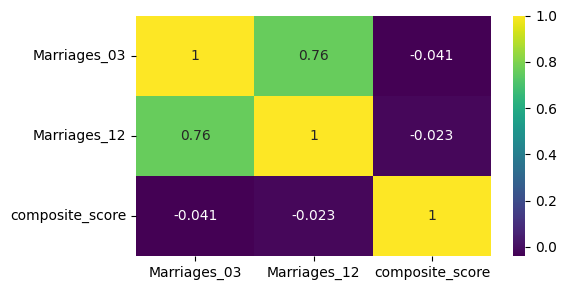

***********************************
Identify highly correlated features
***********************************
Highly Correlated Features | Above threshold of 0.7:
- `Marriages_12` and `Marriages_03`: 0.76


***********************************
Custom thresholds (absolute values)
***********************************

Medium Magnitude Correlations:
- `Marriages_12` and `Marriages_03`: 0.76 (abs: 0.76)


*******************************
Custom thresholds (directional)
*******************************

Strong Positive Correlations:
- `Marriages_12` and `Marriages_03`: 0.76


In [18]:
cols_demographicInformation = ["Age_03", "Age_12", "Urban_03", "Urban_12", "Married_03", "Married_12", "Marriages_03", "Marriages_12", 
                               "Gender", "SpouseGender_03", "SpouseGender_12"]

cols_demographicInformation = validate_and_filter_columns(
    columns_to_validate=cols_demographicInformation,
    all_available_columns=df_cols
)

cols_demographicInformation = cols_demographicInformation + [TARGET_VAR]
# print(f"\nColumns | Demographic Information: {cols_demographicInformation}")

##################################
# Calculate the correlation matrix
##################################
df_demographicInformation = df[cols_demographicInformation]
correlation_matrix = df_demographicInformation.corr(numeric_only = True)

# --- SNS Plot ----
print("*" * 75)
print("Plotting Correlation Matrix | Demographic Information | Using SNS | HeatMap")
print("*" * 75)
plt.figure(figsize = (6, 3)) 
sns.heatmap(correlation_matrix, annot = True, cmap="viridis")
plt.tight_layout()
plt.show()

#####################################
# Identify Highly Correlated Features
#####################################
print("*" * 35)
print("Identify highly correlated features")
print("*" * 35)
highly_correlated_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i):  # Avoid redundant comparisons and diagonal elements
        if abs(correlation_matrix.iloc[i, j]) > THRESHOLD_CORR:
            col1 = correlation_matrix.columns[i]
            col2 = correlation_matrix.columns[j]
            correlation = correlation_matrix.iloc[i, j]
            highly_correlated_pairs.append((col1, col2, correlation))

# Print the highly correlated pairs
if highly_correlated_pairs:
    print(f"Highly Correlated Features | Above threshold of {THRESHOLD_CORR}:")
    for col1, col2, correlation in highly_correlated_pairs:
        print(f"- `{col1}` and `{col2}`: {correlation:.2f}")
else:
    print("No highly correlated features found above the threshold.")

#####################################
# Custom thresholds (absolute values)
#####################################
print("\n")
print("*" * 35)
print("Custom thresholds (absolute values)")
print("*" * 35)
correlation_results_custom_abs = analyze_feature_correlations(df_demographicInformation, thresholds=custom_abs_thresholds)
for level, pairs in correlation_results_custom_abs.items():
    if pairs:
        print(f"\n{level.replace('_', ' ').title()} Correlations:")
        for col1, col2, corr_val in pairs:
            print(f"- `{col1}` and `{col2}`: {corr_val:.2f} (abs: {abs(corr_val):.2f})")

#################################
# Custom thresholds (directional)
#################################
print("\n")
print("*" * 31)
print("Custom thresholds (directional)")
print("*" * 31)
correlation_results_custom_dir = analyze_feature_correlations(df_demographicInformation, thresholds=custom_dir_thresholds)
for level, pairs in correlation_results_custom_dir.items():
    if pairs:
        print(f"\n{level.replace('_', ' ').title()} Correlations:")
        for col1, col2, corr_val in pairs:
            print(f"- `{col1}` and `{col2}`: {corr_val:.2f}")

##### (b) Health and Physical Limitations

All columns were found in the main list. No updates were needed.
***********************************************************************************
Plotting Correlation Matrix | Health and Physical Limitations | Using SNS | HeatMap
***********************************************************************************


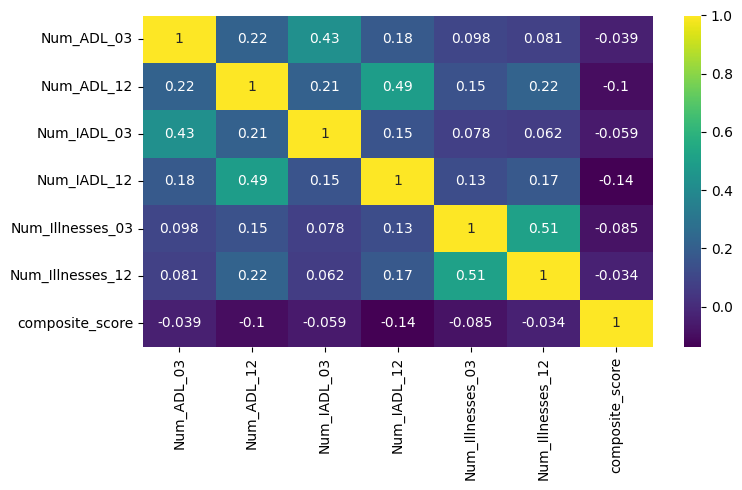

***********************************
Identify highly correlated features
***********************************
No highly correlated features found above the threshold.


***********************************
Custom thresholds (absolute values)
***********************************

Low Magnitude Correlations:
- `Num_IADL_03` and `Num_ADL_03`: 0.43 (abs: 0.43)
- `Num_IADL_12` and `Num_ADL_12`: 0.49 (abs: 0.49)

Medium Magnitude Correlations:
- `Num_Illnesses_12` and `Num_Illnesses_03`: 0.51 (abs: 0.51)


*******************************
Custom thresholds (directional)
*******************************

Moderate Positive Correlations:
- `Num_IADL_03` and `Num_ADL_03`: 0.43
- `Num_IADL_12` and `Num_ADL_12`: 0.49
- `Num_Illnesses_12` and `Num_Illnesses_03`: 0.51


In [19]:
cols_health_and_PhysicalLimitations = ["GlobalHealth_03", "GlobalHealth_12", "ADL_Dress_03", "ADL_Dress_12", "ADL_Walk_03", "ADL_Walk_12", "ADL_Bath_03", "ADL_Bath_12", 
                                       "ADL_Eat_03", "ADL_Eat_12", "ADL_Bed_03", "ADL_Bed_12", "ADL_Toilet_03", "ADL_Toilet_12", "Num_ADL_03", "Num_ADL_12", "IADL_Money_03", 
                                       "IADL_Money_12", "IADL_Meds_03", "IADL_Meds_12", "IADL_Shop_03", "IADL_Shop_12", "IADL_Meals_03", "IADL_Meals_12", "Num_IADL_03", 
                                       "Num_IADL_12", "Hypertension_03", "Hypertension_12", "Diabetes_03", "Diabetes_12", "Respiratory_Illness_03", "Respiratory_Illness_12", 
                                       "Arthritis_03", "Arthritis_12", "HeartAttack_03", "HeartAttack_12", "Stroke_03", "Stroke_12", "Cancer_03", "Cancer_12", 
                                       "Num_Illnesses_03", "Num_Illnesses_12", "BMI_03", "BMI_12"]

cols_health_and_PhysicalLimitations = validate_and_filter_columns(
    columns_to_validate=cols_health_and_PhysicalLimitations,
    all_available_columns=df_cols
)

cols_health_and_PhysicalLimitations = cols_health_and_PhysicalLimitations + [TARGET_VAR]
# print(f"\nColumns | Health and Physical Limitations: {cols_health_and_PhysicalLimitations}")

##################################
# Calculate the correlation matrix
##################################
df_health_and_PhysicalLimitations = df[cols_health_and_PhysicalLimitations]
correlation_matrix = df_health_and_PhysicalLimitations.corr(numeric_only = True)

# --- SNS Plot ----
print("*" * 83)
print("Plotting Correlation Matrix | Health and Physical Limitations | Using SNS | HeatMap")
print("*" * 83)
plt.figure(figsize = (8, 5)) 
sns.heatmap(correlation_matrix, annot = True, cmap="viridis")
plt.tight_layout()
plt.show()

#####################################
# Identify Highly Correlated Features
#####################################
print("*" * 35)
print("Identify highly correlated features")
print("*" * 35)
highly_correlated_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i):  # Avoid redundant comparisons and diagonal elements
        if abs(correlation_matrix.iloc[i, j]) > THRESHOLD_CORR:
            col1 = correlation_matrix.columns[i]
            col2 = correlation_matrix.columns[j]
            correlation = correlation_matrix.iloc[i, j]
            highly_correlated_pairs.append((col1, col2, correlation))

# Print the highly correlated pairs
if highly_correlated_pairs:
    print(f"Highly Correlated Features | Above threshold of {THRESHOLD_CORR}:")
    for col1, col2, correlation in highly_correlated_pairs:
        print(f"- `{col1}` and `{col2}`: {correlation:.2f}")
else:
    print("No highly correlated features found above the threshold.")

#####################################
# Custom thresholds (absolute values)
#####################################
print("\n")
print("*" * 35)
print("Custom thresholds (absolute values)")
print("*" * 35)
correlation_results_custom_abs = analyze_feature_correlations(df_health_and_PhysicalLimitations, thresholds=custom_abs_thresholds)
for level, pairs in correlation_results_custom_abs.items():
    if pairs:
        print(f"\n{level.replace('_', ' ').title()} Correlations:")
        for col1, col2, corr_val in pairs:
            print(f"- `{col1}` and `{col2}`: {corr_val:.2f} (abs: {abs(corr_val):.2f})")

#################################
# Custom thresholds (directional)
#################################
print("\n")
print("*" * 31)
print("Custom thresholds (directional)")
print("*" * 31)
correlation_results_custom_dir = analyze_feature_correlations(df_health_and_PhysicalLimitations, thresholds=custom_dir_thresholds)
for level, pairs in correlation_results_custom_dir.items():
    if pairs:
        print(f"\n{level.replace('_', ' ').title()} Correlations:")
        for col1, col2, corr_val in pairs:
            print(f"- `{col1}` and `{col2}`: {corr_val:.2f}")

##### (c) Mental Health and Well Being

--- Column List Update ---
The following columns were NOT found in the main list and have been removed:
- Happy_03
- Happy_12
- Tired_03
- Tired_12
--------------------------
********************************************************************************
Plotting Correlation Matrix | Mental Health and Well Being | Using SNS | HeatMap
********************************************************************************


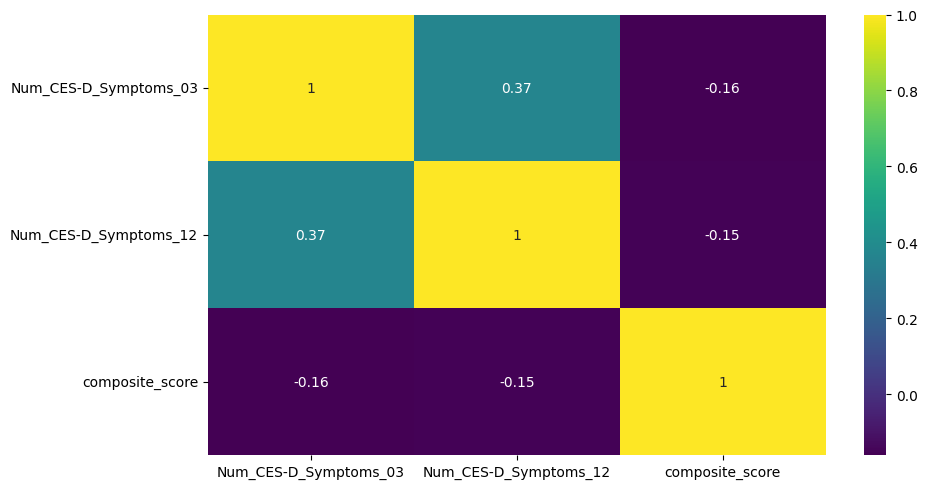

***********************************
Identify highly correlated features
***********************************
No highly correlated features found above the threshold.


***********************************
Custom thresholds (absolute values)
***********************************

Low Magnitude Correlations:
- `Num_CES-D_Symptoms_12` and `Num_CES-D_Symptoms_03`: 0.37 (abs: 0.37)


*******************************
Custom thresholds (directional)
*******************************


In [20]:
cols_mentalHealth_and_Well_being = ["Depressed_03", "Depressed_12", "Hard_03", "Hard_12", "Restless_03", "Restless_12", "Happy_03", "Happy_12", "Lonely_03", "Lonely_12", 
                                    "Enjoy_03", "Enjoy_12", "Sad_03", "Sad_12", "Tired_03", "Tired_12", "Energetic_03", "Energetic_12", "Num_CES-D_Symptoms_03", 
                                    "Num_CES-D_Symptoms_12", "CES-D_Symptoms_03", "CES-D_Symptoms_12"]

cols_mentalHealth_and_Well_being = validate_and_filter_columns(
    columns_to_validate=cols_mentalHealth_and_Well_being,
    all_available_columns=df_cols
)

cols_mentalHealth_and_Well_being = cols_mentalHealth_and_Well_being + [TARGET_VAR]
# print(f"\nColumns | Mental Health and Well-being: {cols_mentalHealth_and_Well_being}")

##################################
# Calculate the correlation matrix
##################################
df_mentalHealth_and_Well_being = df[cols_mentalHealth_and_Well_being]
correlation_matrix = df_mentalHealth_and_Well_being.corr(numeric_only = True)

# --- SNS Plot ----
print("*" * 80)
print("Plotting Correlation Matrix | Mental Health and Well Being | Using SNS | HeatMap")
print("*" * 80)
plt.figure(figsize = (10, 5)) 
sns.heatmap(correlation_matrix, annot = True, cmap="viridis")
plt.tight_layout()
plt.show()

#####################################
# Identify Highly Correlated Features
#####################################
print("*" * 35)
print("Identify highly correlated features")
print("*" * 35)
highly_correlated_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i):  # Avoid redundant comparisons and diagonal elements
        if abs(correlation_matrix.iloc[i, j]) > THRESHOLD_CORR:
            col1 = correlation_matrix.columns[i]
            col2 = correlation_matrix.columns[j]
            correlation = correlation_matrix.iloc[i, j]
            highly_correlated_pairs.append((col1, col2, correlation))

# Print the highly correlated pairs
if highly_correlated_pairs:
    print(f"Highly Correlated Features | Above threshold of {THRESHOLD_CORR}:")
    for col1, col2, correlation in highly_correlated_pairs:
        print(f"- `{col1}` and `{col2}`: {correlation:.2f}")
else:
    print("No highly correlated features found above the threshold.")

#####################################
# Custom thresholds (absolute values)
#####################################
print("\n")
print("*" * 35)
print("Custom thresholds (absolute values)")
print("*" * 35)
correlation_results_custom_abs = analyze_feature_correlations(df_mentalHealth_and_Well_being, thresholds=custom_abs_thresholds)
for level, pairs in correlation_results_custom_abs.items():
    if pairs:
        print(f"\n{level.replace('_', ' ').title()} Correlations:")
        for col1, col2, corr_val in pairs:
            print(f"- `{col1}` and `{col2}`: {corr_val:.2f} (abs: {abs(corr_val):.2f})")

#################################
# Custom thresholds (directional)
#################################
print("\n")
print("*" * 31)
print("Custom thresholds (directional)")
print("*" * 31)
correlation_results_custom_dir = analyze_feature_correlations(df_mentalHealth_and_Well_being, thresholds=custom_dir_thresholds)
for level, pairs in correlation_results_custom_dir.items():
    if pairs:
        print(f"\n{level.replace('_', ' ').title()} Correlations:")
        for col1, col2, corr_val in pairs:
            print(f"- `{col1}` and `{col2}`: {corr_val:.2f}")

##### (d) Life Style and Behavior

All columns were found in the main list. No updates were needed.
***************************************************************************
Plotting Correlation Matrix | Life Style and Behavior | Using SNS | HeatMap
***************************************************************************


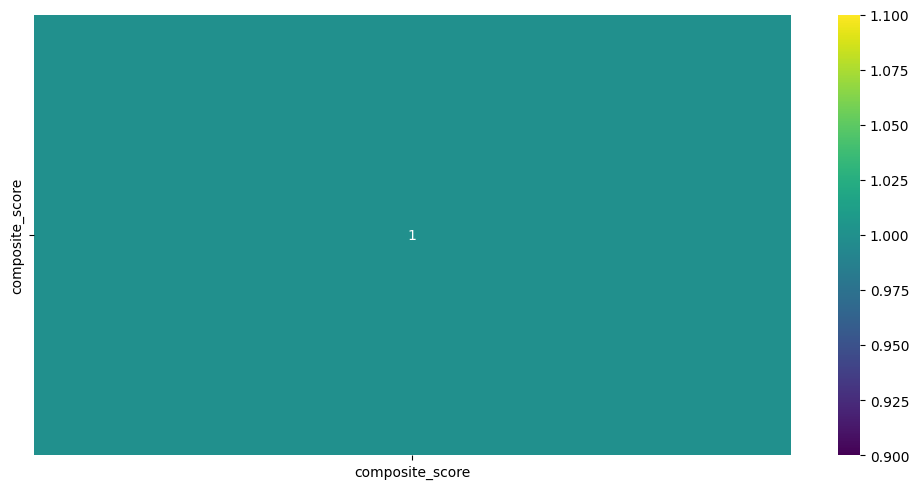

***********************************
Identify highly correlated features
***********************************
No highly correlated features found above the threshold.


***********************************
Custom thresholds (absolute values)
***********************************


*******************************
Custom thresholds (directional)
*******************************


In [21]:
cols_lifestyle_and_Behavior = ["Exercise_03", "Exercise_12", "Alcohol_03", "Alcohol_12", "Tobacco_03", "Tobacco_12", "Test_Cholestrol_03", "Test_Cholestrol_12", 
                               "Test_Tuber_03", "Test_Tuber_12", "Test_Diabetes_03", "Test_Diabetes_12", "Test_BloodPress_03", "Test_BloodPress_12", 
                               "Hospitalized_03", "Hospitalized_12", "Visit_Dr_03", "Visit_Dr_12", "OutPatient_03", "OutPatient_12", "Visit_Dental_03", 
                               "Visit_Dental_12"]

cols_lifestyle_and_Behavior = validate_and_filter_columns(
    columns_to_validate=cols_lifestyle_and_Behavior,
    all_available_columns=df_cols
)

cols_lifestyle_and_Behavior = cols_lifestyle_and_Behavior + [TARGET_VAR]
# print(f"\nColumns | Lifestyle and Behavior: {cols_lifestyle_and_Behavior}")

##################################
# Calculate the correlation matrix
##################################
df_lifestyle_and_Behavior = df[cols_lifestyle_and_Behavior]
correlation_matrix = df_lifestyle_and_Behavior.corr(numeric_only = True)

# --- SNS Plot ----
print("*" * 75)
print("Plotting Correlation Matrix | Life Style and Behavior | Using SNS | HeatMap")
print("*" * 75)
plt.figure(figsize = (10, 5)) 
sns.heatmap(correlation_matrix, annot = True, cmap="viridis")
plt.tight_layout()
plt.show()

#####################################
# Identify Highly Correlated Features
#####################################
print("*" * 35)
print("Identify highly correlated features")
print("*" * 35)
highly_correlated_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i):  # Avoid redundant comparisons and diagonal elements
        if abs(correlation_matrix.iloc[i, j]) > THRESHOLD_CORR:
            col1 = correlation_matrix.columns[i]
            col2 = correlation_matrix.columns[j]
            correlation = correlation_matrix.iloc[i, j]
            highly_correlated_pairs.append((col1, col2, correlation))

# Print the highly correlated pairs
if highly_correlated_pairs:
    print(f"Highly Correlated Features | Above threshold of {THRESHOLD_CORR}:")
    for col1, col2, correlation in highly_correlated_pairs:
        print(f"- `{col1}` and `{col2}`: {correlation:.2f}")
else:
    print("No highly correlated features found above the threshold.")

#####################################
# Custom thresholds (absolute values)
#####################################
print("\n")
print("*" * 35)
print("Custom thresholds (absolute values)")
print("*" * 35)
correlation_results_custom_abs = analyze_feature_correlations(df_lifestyle_and_Behavior, thresholds=custom_abs_thresholds)
for level, pairs in correlation_results_custom_abs.items():
    if pairs:
        print(f"\n{level.replace('_', ' ').title()} Correlations:")
        for col1, col2, corr_val in pairs:
            print(f"- `{col1}` and `{col2}`: {corr_val:.2f} (abs: {abs(corr_val):.2f})")

#################################
# Custom thresholds (directional)
#################################
print("\n")
print("*" * 31)
print("Custom thresholds (directional)")
print("*" * 31)
correlation_results_custom_dir = analyze_feature_correlations(df_lifestyle_and_Behavior, thresholds=custom_dir_thresholds)
for level, pairs in correlation_results_custom_dir.items():
    if pairs:
        print(f"\n{level.replace('_', ' ').title()} Correlations:")
        for col1, col2, corr_val in pairs:
            print(f"- `{col1}` and `{col2}`: {corr_val:.2f}")

##### (e) Social and Family Dynamics

--- Column List Update ---
The following columns were NOT found in the main list and have been removed:
- decis_personal_03
- decis_personal_12
--------------------------

Columns | Social and Family Dynamics: ['Num_Living_Child_03', 'Num_Living_Child_12', 'Migration_03', 'Migration_12', 'FamilyDecisions_03', 'FamilyDecisions_12', 'CareAdult_12', 'CareChild_12', 'Volunteer_12', 'AttendsClass_12', 'AttendsClub_12', 'Reads_12', 'Games_12', 'TableGames_12', 'UseElectronicDevices_12', 'HouseMaintenance_12', 'TV_12', 'Sewing_12', 'Satement_Ideal_12', 'Satement_Excel_12', 'Satement_Fine_12', 'COSAS_IMP_12', 'WouldntChange_12', 'Memory_12', 'Religon_Imp_03', 'Religon_Imp_12', 'Meet_FnF_12', 'SocialActivities_12', 'AttendReligiousServices_12', 'composite_score']
***************************************************************************
Plotting Correlation Matrix | Social and Family Dynamics | Using SNS | HeatMap
***************************************************************************


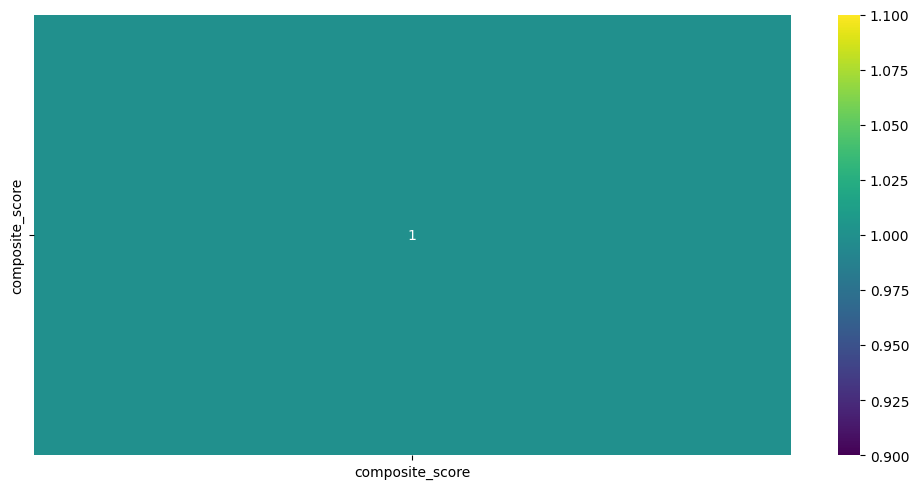

***********************************
Identify highly correlated features
***********************************
No highly correlated features found above the threshold.


***********************************
Custom thresholds (absolute values)
***********************************


*******************************
Custom thresholds (directional)
*******************************


In [22]:
cols_social_and_FamilyDynamics = ["Num_Living_Child_03", "Num_Living_Child_12", "Migration_03", "Migration_12", "FamilyDecisions_03", "FamilyDecisions_12", 
                                  "CareAdult_12", "CareChild_12", "Volunteer_12", "AttendsClass_12", "AttendsClub_12", "Reads_12", "Games_12", "TableGames_12", 
                                  "UseElectronicDevices_12", "HouseMaintenance_12", "TV_12", "Sewing_12", "Satement_Ideal_12", "Satement_Excel_12", 
                                  "Satement_Fine_12", "COSAS_IMP_12", "WouldntChange_12", "Memory_12", "Religon_Imp_03", "Religon_Imp_12", "Meet_FnF_12", 
                                  "SocialActivities_12", "AttendReligiousServices_12", "decis_personal_03", "decis_personal_12"]

cols_social_and_FamilyDynamics = validate_and_filter_columns(
    columns_to_validate=cols_social_and_FamilyDynamics,
    all_available_columns=df_cols
)

cols_social_and_FamilyDynamics = cols_social_and_FamilyDynamics + [TARGET_VAR]
print(f"\nColumns | Social and Family Dynamics: {cols_social_and_FamilyDynamics}")

##################################
# Calculate the correlation matrix
##################################
df_social_and_FamilyDynamics = df[cols_social_and_FamilyDynamics]
correlation_matrix = df_social_and_FamilyDynamics.corr(numeric_only = True)

# --- SNS Plot ----
print("*" * 75)
print("Plotting Correlation Matrix | Social and Family Dynamics | Using SNS | HeatMap")
print("*" * 75)
plt.figure(figsize = (10, 5)) 
sns.heatmap(correlation_matrix, annot = True, cmap="viridis")
plt.tight_layout()
plt.show()

#####################################
# Identify Highly Correlated Features
#####################################
print("*" * 35)
print("Identify highly correlated features")
print("*" * 35)
highly_correlated_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i):  # Avoid redundant comparisons and diagonal elements
        if abs(correlation_matrix.iloc[i, j]) > THRESHOLD_CORR:
            col1 = correlation_matrix.columns[i]
            col2 = correlation_matrix.columns[j]
            correlation = correlation_matrix.iloc[i, j]
            highly_correlated_pairs.append((col1, col2, correlation))

# Print the highly correlated pairs
if highly_correlated_pairs:
    print(f"Highly Correlated Features | Above threshold of {THRESHOLD_CORR}:")
    for col1, col2, correlation in highly_correlated_pairs:
        print(f"- `{col1}` and `{col2}`: {correlation:.2f}")
else:
    print("No highly correlated features found above the threshold.")

#####################################
# Custom thresholds (absolute values)
#####################################
print("\n")
print("*" * 35)
print("Custom thresholds (absolute values)")
print("*" * 35)
correlation_results_custom_abs = analyze_feature_correlations(df_social_and_FamilyDynamics, thresholds=custom_abs_thresholds)
for level, pairs in correlation_results_custom_abs.items():
    if pairs:
        print(f"\n{level.replace('_', ' ').title()} Correlations:")
        for col1, col2, corr_val in pairs:
            print(f"- `{col1}` and `{col2}`: {corr_val:.2f} (abs: {abs(corr_val):.2f})")

#################################
# Custom thresholds (directional)
#################################
print("\n")
print("*" * 31)
print("Custom thresholds (directional)")
print("*" * 31)
correlation_results_custom_dir = analyze_feature_correlations(df_social_and_FamilyDynamics, thresholds=custom_dir_thresholds)
for level, pairs in correlation_results_custom_dir.items():
    if pairs:
        print(f"\n{level.replace('_', ' ').title()} Correlations:")
        for col1, col2, corr_val in pairs:
            print(f"- `{col1}` and `{col2}`: {corr_val:.2f}")

In [23]:
# cols_socioeconomicStatus = ["Education_03", "Education_12", "Employment_03", "Employment_12", "Earnings_03", "Earnings_12", "SpouseEarnings_03", "SpouseEarnings_12", 
#                             "hincome_03", "hincome_12", "hinc_business_03", "hinc_business_12", "hinc_rent_03", "hinc_rent_12", "hinc_assets_03", "hinc_assets_12",	
#                             "hinc_cap_03", "hinc_cap_12", "Pension_03", "Pension_12", "SpousePension__03", "SpousePension__12"]

# cols_demographicInformation = validate_and_filter_columns(
#     columns_to_validate=cols_demographicInformation,
#     all_available_columns=df_cols
# )

# cols_socioeconomicStatus = validate_and_filter_columns(
#     columns_to_validate=cols_socioeconomicStatus,
#     all_available_columns=df_cols
# )

# cols_health_and_PhysicalLimitations = validate_and_filter_columns(
#     columns_to_validate=cols_health_and_PhysicalLimitations,
#     all_available_columns=df_cols
# )

# cols_mentalHealth_and_Well_being = validate_and_filter_columns(
#     columns_to_validate=cols_mentalHealth_and_Well_being,
#     all_available_columns=df_cols
# )

# cols_lifestyle_and_Behavior = validate_and_filter_columns(
#     columns_to_validate=cols_lifestyle_and_Behavior,
#     all_available_columns=df_cols
# )

# cols_social_and_FamilyDynamics = validate_and_filter_columns(
#     columns_to_validate=cols_social_and_FamilyDynamics,
#     all_available_columns=df_cols
# )

# print(f"\nColumns | Socioeconomic Status: {cols_socioeconomicStatus}")

#### Relationship Between `Year` and `composite_score`

In [24]:
# df1 = df.copy() # No Need | It is being taken care off inside camparison functions
# visualize_bar_plot(df1, "composite_score", "mean", "Year", background_color="white", text_color="black")
# visualize_comparison_box(df1, "composite_score", "Year", background_color="white", text_color="black", width=1000, height=600)
# visualize_comparison_strip(df1, "composite_score", "Year", background_color="white", text_color="black", width=1000, height=600)

# visualize_comparison_violin(df, "composite_score", "Year", background_color="white", text_color="black", width=1000, height=600)

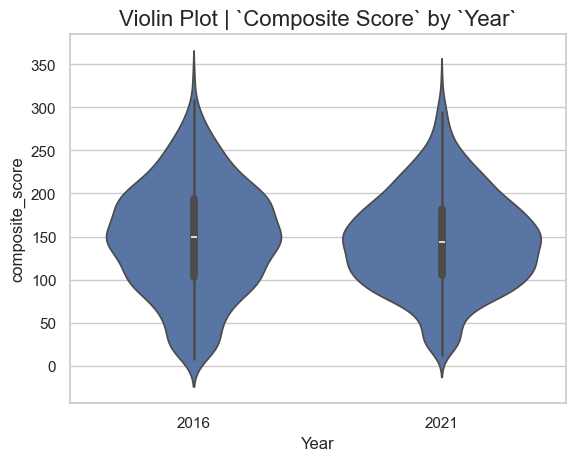

In [25]:
sns.set(style = 'whitegrid') 
ax = sns.violinplot(x="Year", y="composite_score", 
            # hue ="", 
            # palette="Set2",
            # dodge=True,
            data = df)

ax.set_title("Violin Plot | `Composite Score` by `Year`", fontsize=16)
plt.show()

#### Analysis of `Composite Score` Distribution: `2016` vs. `2021`

##### **Composite Scores Show a Slight Shift and Tightening in Distribution Between 2016 and 2021.**

---

##### Detailed Insights:

##### 1. Central Tendency (Median):
*   In **2016 (Orange)**, the median `composite_score` was **149**.
*   In **2021 (Green)**, the median `composite_score` was **144**.
    *   **Insight:** There's a slight decrease in the median composite score from 2016 to 2021. This suggests that, on average, the central point of the scores was a bit lower in 2021.

##### 2. Dispersion & Spread (IQR, Fences, Overall Range):
*   **Interquartile Range (IQR = Q3 - Q1):**
    *   2016: Q1 = 103, Q3 = 194. **IQR = 91**.
    *   2021: Q1 = 105, Q3 = 182. **IQR = 77**.
        *   **Insight Point:** The IQR is noticeably smaller in 2021. This means the middle 50% of the `composite_score` data is more tightly clustered around the median in 2021 compared to 2016, where it was more spread out.
*   **Fences (Typical Range, excluding outliers):**
    *   2016: Lower fence = 8, Upper fence = 308.
    *   2021: Lower fence = 12, Upper fence = 295.
        *   **Insight Point:** The "typical" range of scores (as defined by the fences) has also contracted slightly in 2021, especially at the higher end. The minimum typical score went up a bit, and the maximum typical score came down.
*   **Overall Range (Min to Max):**
    *   2016: Min = 8, Max = 334. Range = 326.
    *   2021: Min = 12, Max = 332. Range = 320.
        *   **Insight Point:** The absolute overall range is quite similar, but the slight shifts in min/max contribute to the sense of a slightly more compressed distribution in 2021.

##### 3. Distribution Shape (Violin Shape & KDE markers):
*   Both violins show a **unimodal distribution** (one main peak).
*   The 2016 violin appears slightly **broader** in its main body (around the median and IQR) compared to the 2021 violin, which looks a bit more "pinched" or concentrated, aligning with the smaller IQR.
*   The KDE (Kernel Density Estimate) values at the marked `y` points:
    *   2016: `y: 230.8802, kde: 0.422`
    *   2021: `y: 211.0883, kde: 0.514`
        *   **Insight Point (interpret with caution as these are single points):** The KDE value is an estimate of the probability density. A higher KDE value means more data points are concentrated around that `y` value. The 2021 plot shows a higher KDE value at its marked point (around a score of 211) than 2016 does at its (around 230), suggesting 2021 might have a denser cluster of scores in its upper-middle range compared to 2016 in a similar region. However, the primary visual cue is the overall violin shape.

##### 4. Outliers & Extreme Values:
*   Both years show scores extending beyond the "upper fence," indicating some individuals achieved very high scores (outliers).
*   The swarm plot (the individual dots) in 2016 seems to have a few more very low scores (closer to 0-20 range) compared to 2021.
    *   **Insight Point:** Both periods had high-achievers. 2016 might have had a slightly more pronounced tail of very low scores compared to 2021, where the lowest scores seem to start a bit higher.

---

##### Putting it Together - The Narrative:

An analysis of `composite_scores` between 2016 and 2021 reveals a subtle but interesting evolution in their distribution.

In 2021, the **median score (144) was slightly lower** than in 2016 (149). More significantly, the scores in 2021 demonstrated **less variability in the central part of the distribution**. The interquartile range (IQR), which captures the middle 50% of scores, shrank from 91 in 2016 to 77 in 2021. This indicates that a larger proportion of individuals in 2021 scored closer to the median compared to 2016, where scores were more spread out.

This tightening is also reflected in the typical range of scores (defined by the fences), which contracted slightly in 2021, particularly at the upper end. While both years saw individuals achieving exceptionally high scores (outliers), the 2016 data showed a slightly wider overall spread, including a few more instances of very low scores.

In essence, the `composite_score` landscape in 2021 was characterized by scores that were, on average, a touch lower and more homogeneously grouped around the typical values, compared to the slightly higher average and more dispersed scores seen in 2016.

---

##### Potential Follow-up Questions This Story Might Lead To:

*   What factors could have contributed to this slight decrease in median and tightening of the distribution? (e.g., changes in the assessment, demographic shifts, interventions, external factors).
*   Are these observed differences statistically significant? (You'd need to run a statistical test like a Mann-Whitney U test).
*   How do these changes correlate with other features in your dataset?

<hr>

## Why the Correlation Matrix is Just the First Step

1. It Misses `Non-Linear Relationships`: A feature could be highly predictive in a `U-shape` or an `S-shape curve`, but if it's not a straight line, its `correlation` will be `near zero`. For example, a `composite_score` might be `low` for `very young` and `very old` people but `high` for `middle-aged` people. Correlation would completely miss this.
   
2. It Can't See Interaction Effects: This is the most critical limitation. A feature might only become important in the presence of another feature. For example, maybe `income` only matters for people who are `retired`. A `correlation matrix` looks at `income` and `retirement_status` separately and might conclude neither is important, completely missing their powerful combined effect.

<hr>

### Proposed Deeper Analysis: A 3-Step Plan

<hr>


To uncover these hidden patterns, we need to let a powerful model do the work for us and then use modern tools to interpret what the model has learned. The best approach is to use a `tree-based model`, like `XGBoost` or a `Random Forest`, because they are excellent at capturing `non-linearities` and `interactions` automatically.

Here is a step-by-step plan:

#### Step 1: Model-Based Feature Importance

<hr>

Instead of asking "What is the `linear correlation`?", we will ask a much better question: "Which features did the model find most useful for making `accurate predictions`?"

- What it is: First, you train a robust model (like `XGBoost`, `LightGBM`, or a `Random Forest`) on your data. After training, you can extract its `feature_importances`. This is a ranked list of features that the model relied on most heavily.

- Why it's deeper: The model considers all features simultaneously. It will automatically give a `high importance score` to features that are `useful`, even if their relationship to the `target` is `complex and non-linear`. It also accounts for `interaction effects` implicitly.

- What you get: A simple, `ranked bar chart` showing your `most powerful predictors`. You might be surprised to find that a feature with a `near-zero correlation score` is actually one of your most important features!

#### Step 2: Explainable AI with SHAP (SHapley Additive exPlanations)

<hr>

This is the gold standard for model interpretation and will give you the deep insights you're looking for. Feature importance tells you what is important globally, but `SHAP` tells you how and why each feature impacts individual predictions.

- What it is: `SHAP` is a cutting-edge technique that explains the output of any machine learning model. For each prediction, it calculates the contribution of each feature.
  
- Why it's deeper:
    1. It reveals the `direction of the effect` (does a high value of the feature push the prediction up or down?).
    2. It shows the `magnitude of the effect`.
    3. It can beautifully `visualize non-linear relationships` and `interaction effects`.
  
- What you get (The Most Powerful Visuals):
    1. `SHAP` Summary Plot (Beeswarm): This is the most valuable plot. Each dot is a person in your dataset.
         - Its position on the `x-axis` shows its impact on the `prediction (positive or negative)`.
         - Its color shows the `feature's value (high or low)`.
         - This single plot can show you that, for example, high `Num_CES-D_Symptoms` (red dots) strongly pushes the predicted score down `(negative SHAP value)`.
    2. `SHAP Dependence Plots`: These are like next-generation scatter plots. They show how a feature's value relates to its `SHAP value`, perfectly illustrating the `non-linear patterns` that the `correlation matrix` missed.
  

#### Step 3: Unsupervised Clustering

<hr>

This is an exploratory approach to see if there are "hidden groups" within your data.

- What it is: Use an algorithm like `K-Means` to group your subjects based on their `features`, without looking at the `composite_score`.
- Why it's deeper: You might discover that your population `isn't one uniform group`, but 2, 3, or 4 distinct `phenotypes.` For example, you might find:
    - Cluster 0: "Healthy and Wealthy" (`low illness count`, `high income`).
    - Cluster 1: "Struggling and Isolated" (`high depressive symptoms`, `low social contact`).
    - Cluster 2: "Physically Frail but Financially Secure" (`high ADL/IADL` issues, `high pension`).

- The "So What?": The relationships between features and the `composite_score` might be completely different and much stronger within each cluster. Analyzing the `composite_score` for `each group separately` could reveal powerful insights that are washed out when you look at the population as a whole.

<hr>

#### Recommendation Summary

<hr>

1. Start with Model-Based Feature Importance. It's a quick and massive upgrade from the correlation matrix to find your most powerful features.
2. Then, use `SHAP` to do a deep dive on those top features. This will explain how they work and uncover the complex relationships.
3. If your model performance is still not great, use `Clustering` to see if you can find `distinct subgroups` that behave differently.

#### Save to .CSV

In [53]:
# df.to_csv(path_train_new, index=False, encoding="utf8")
# print(f"Path to Save Cleaned File: {path_train_new}")